In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression

In [22]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [23]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [24]:
df = pd.read_csv("C:../../Dataset/FECourseData/autos.csv")

In [25]:
features = ["highway_mpg", "engine_size", "horsepower", "curb_weight"]

X = df.copy()
y = X.pop('price')
X = X.loc[:, features]

# Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [26]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [27]:
component_names = [f'PC{i+1}' for i in range(X_pca.shape[1])]

In [28]:
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4
0,0.382486,-0.400222,0.124122,0.169539
1,0.382486,-0.400222,0.124122,0.169539
2,1.550890,-0.107175,0.598361,-0.256081
3,-0.408859,-0.425947,0.243335,0.013920
4,1.132749,-0.814565,-0.202885,0.224138


In [29]:
pca.components_

array([[-0.4923469 ,  0.50385865,  0.50044809,  0.50326205],
       [ 0.77089183,  0.62670948,  0.01378838,  0.11300841],
       [ 0.07014167,  0.01996004,  0.73109336, -0.67836881],
       [-0.39799556,  0.59410713, -0.46353435, -0.52323242]])

In [30]:
X.columns

Index(['highway_mpg', 'engine_size', 'horsepower', 'curb_weight'], dtype='object')

In [31]:
loadings = pd.DataFrame(
                pca.components_.T,
                columns=component_names,
                index=X.columns)

In [32]:
loadings

,PC1,PC2,PC3,PC4
highway_mpg,-0.492347,0.770892,0.070142,-0.397996
engine_size,0.503859,0.626709,0.019960,0.594107
horsepower,0.500448,0.013788,0.731093,-0.463534
curb_weight,0.503262,0.113008,-0.678369,-0.523232


In [38]:
loadings.PC1

highway_mpg   -0.492347
engine_size    0.503859
horsepower     0.500448
curb_weight    0.503262
Name: PC1, dtype: float64

array([<AxesSubplot:title={'center':'% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot:title={'center':'% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

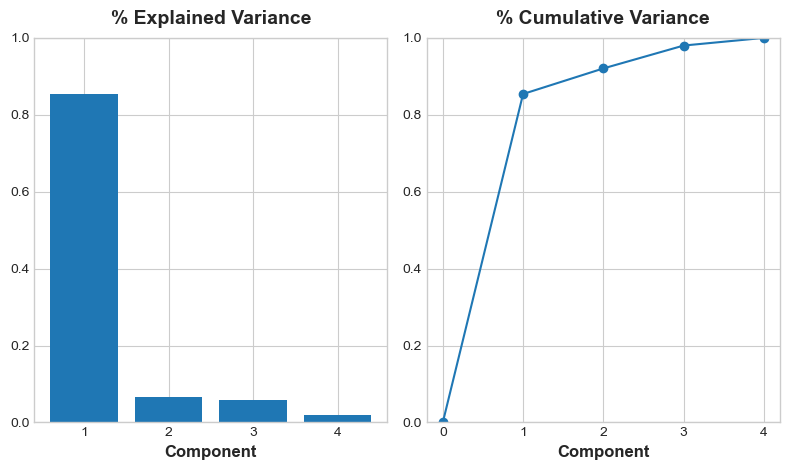

In [43]:
plot_variance(pca)

In [34]:
def calculate_variance(data):
    n = len(data)

    if n < 2:
        # Variance is undefined for a single data point
        raise ValueError("Variance is undefined for less than two data points")

    mean = sum(data) / n
    squared_diff = [(x - mean) ** 2 for x in data]
    variance = sum(squared_diff) / (n - 1)  # Use (n-1) for sample variance

    return variance

In [41]:
calculate_variance(loadings.PC3)

0.33163338827611355

In [44]:
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

PC1    1.013923
PC2    0.378989
PC3    0.307660
PC4    0.205405
Name: MI Scores, dtype: float64

In [45]:
idx = X_pca["PC3"].sort_values(ascending=False).index
cols = ["make", "body_style", "horsepower", "curb_weight"]

In [47]:
df.loc[idx, cols]

,make,body_style,horsepower,curb_weight
118,porsche,hardtop,207,2756
117,porsche,hardtop,207,2756
119,porsche,convertible,207,2800
45,jaguar,sedan,262,3950
96,nissan,hatchback,200,3139
...,...,...,...,...
59,mercedes-benz,wagon,123,3750
61,mercedes-benz,sedan,123,3770
101,peugot,wagon,95,3430
105,peugot,wagon,95,3485


<AxesSubplot:xlabel='sports_or_wagon', ylabel='price'>

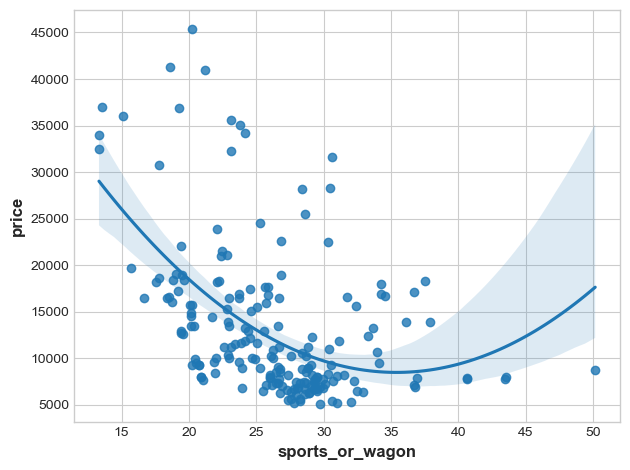

In [49]:
df['sports_or_wagon'] = X.curb_weight / X.horsepower
sns.regplot(x='sports_or_wagon', y='price', data=df, order=2)